In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets

In [3]:
CDF = pd.read_csv('Country-data.csv')

In [4]:
CDF.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
CDF.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
CDF.duplicated().value_counts()

False    167
dtype: int64

In [7]:
CDF.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
df1 = CDF[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [9]:
df1.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

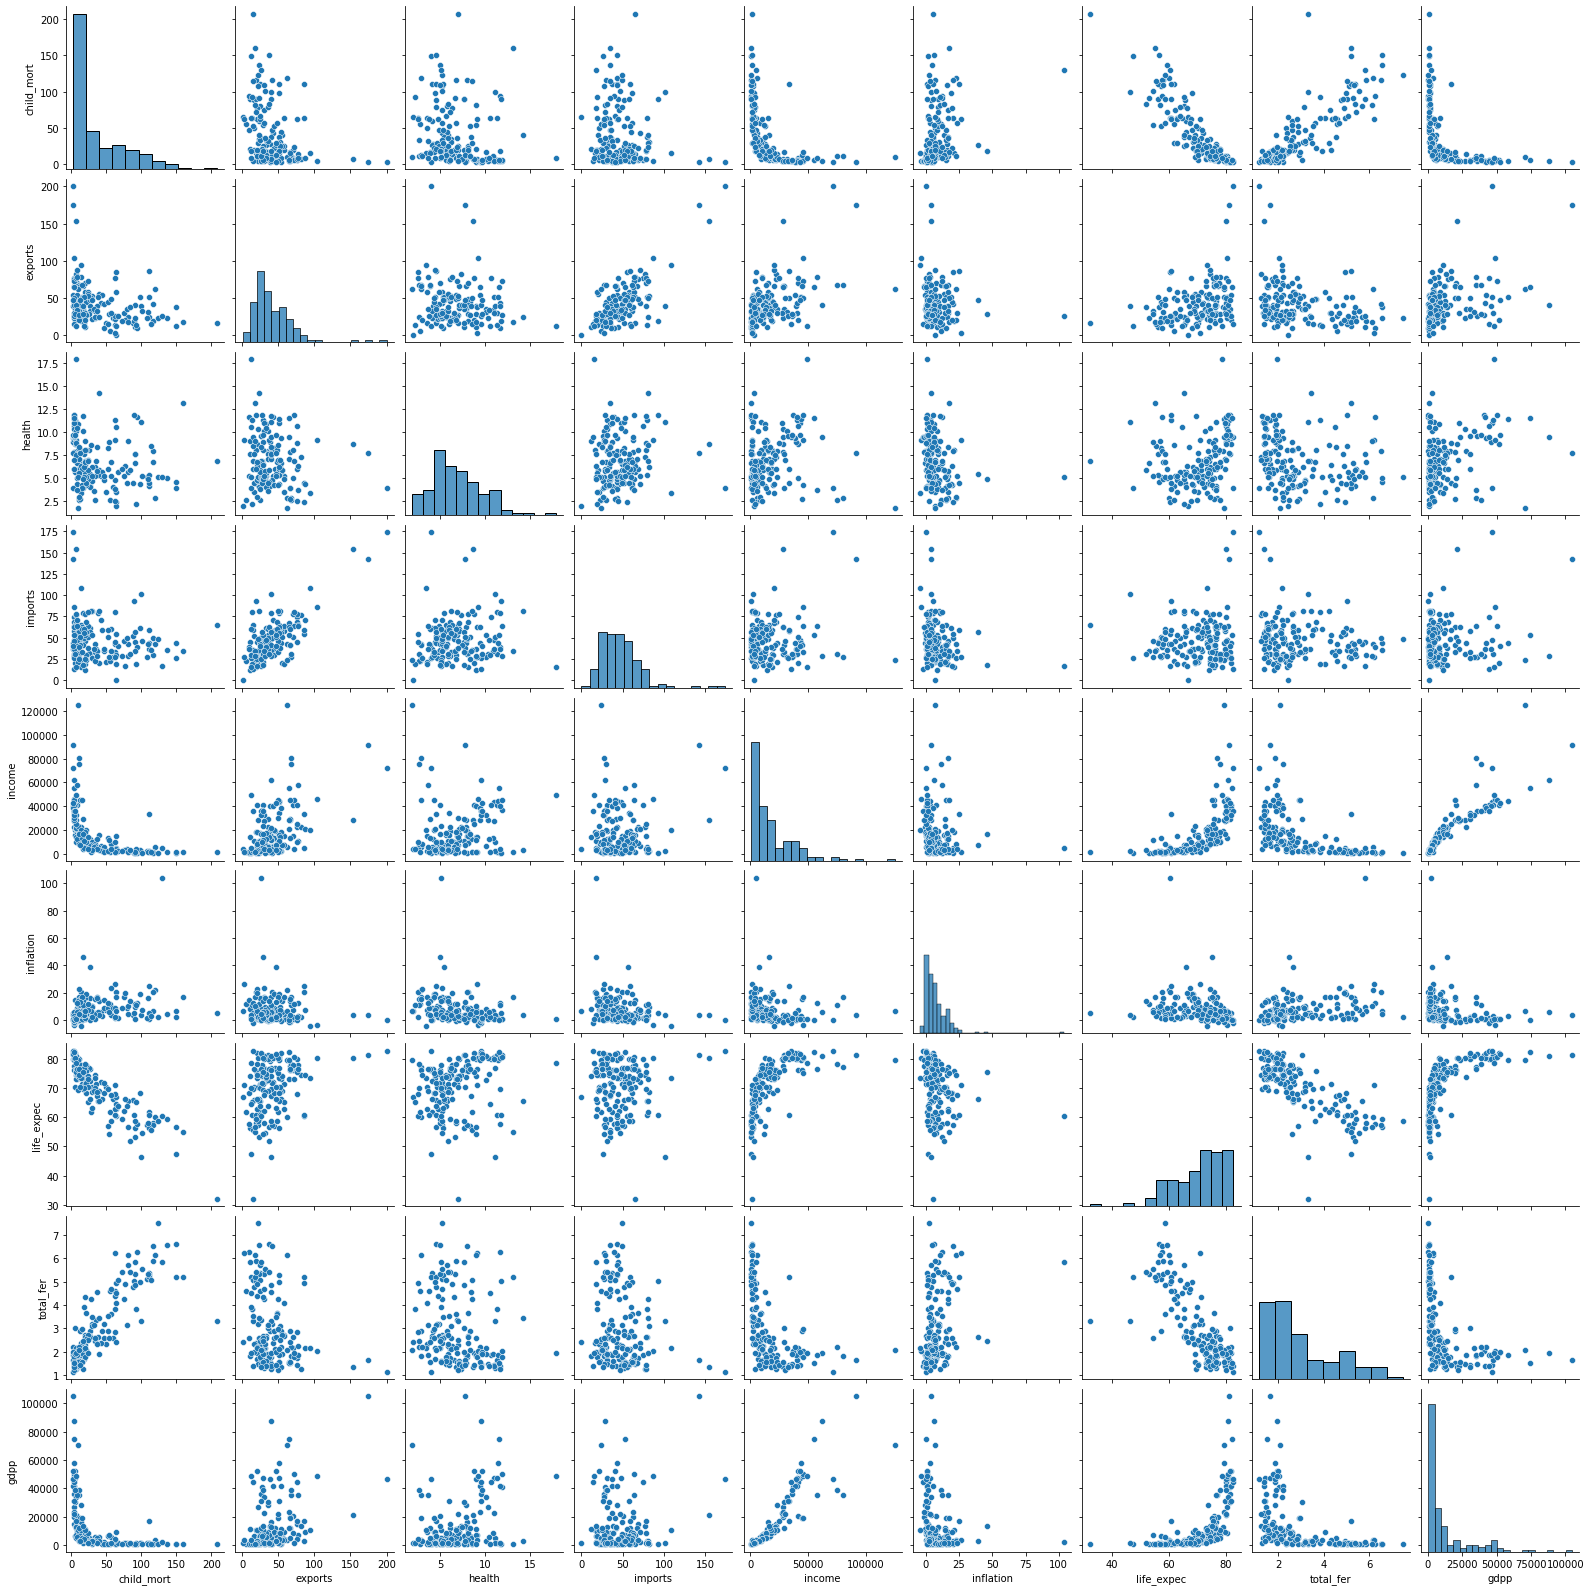

In [10]:
sns.pairplot(df1)

In [11]:
df2 = CDF[['country', 'child_mort','health','income',
       'life_expec', 'total_fer', 'gdpp']]

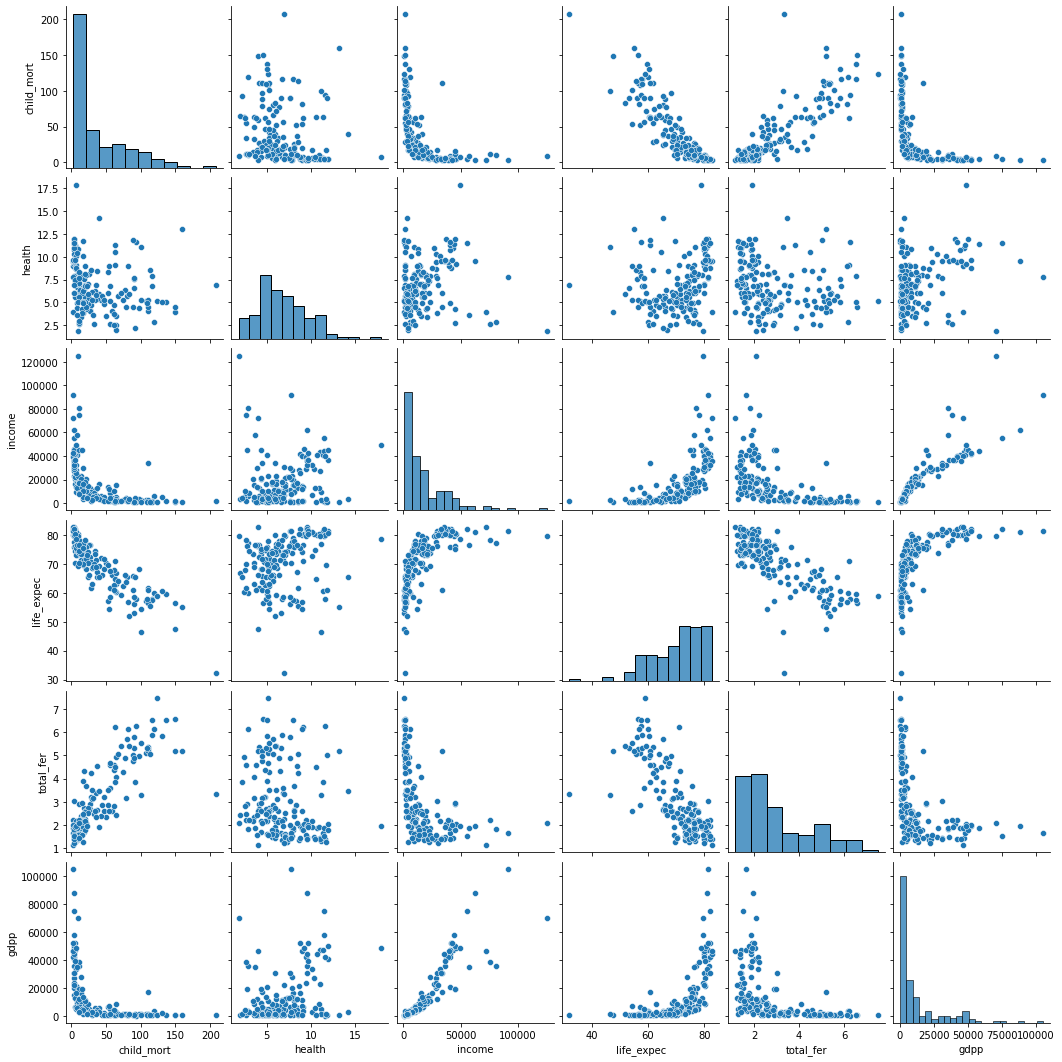

In [12]:
sns.pairplot(df2)

<AxesSubplot:xlabel='income', ylabel='total_fer'>

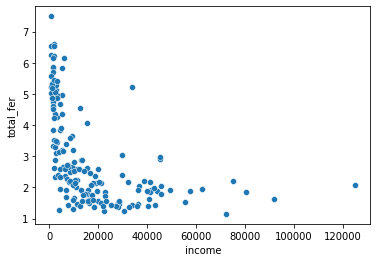

In [14]:
sns.scatterplot(x='income', y='total_fer', data=df1)

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

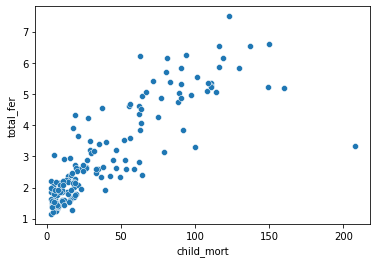

In [15]:
sns.scatterplot(x='child_mort', y='total_fer', data=df1)

<AxesSubplot:>

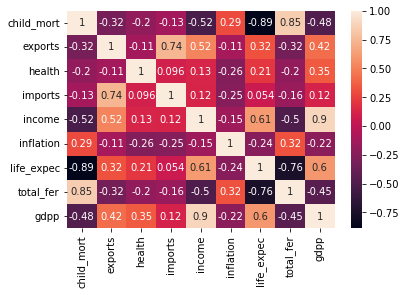

In [16]:
sns.heatmap(df1.corr(), annot=True)

In [17]:
df1['index'] = df1['country'].rank(method='dense', ascending=True).astype(int)

In [19]:
X = df1[['child_mort','exports','health','imports','income','inflation', 'life_expec', 'total_fer', 'gdpp']]

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

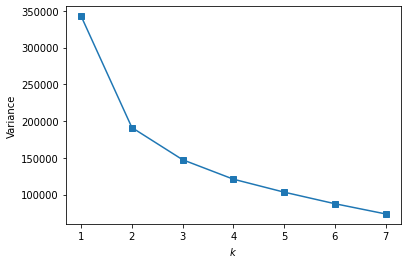

In [23]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [24]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(X)
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='income', ylabel='total_fer'>

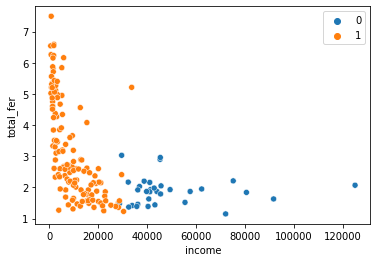

In [27]:
sns.scatterplot(x =df1['income'] , y = df1['total_fer'], hue=y)

<AxesSubplot:xlabel='gdpp', ylabel='life_expec'>

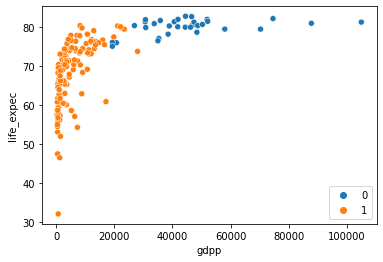

In [28]:
sns.scatterplot(x =df1['gdpp'] , y = df1['life_expec'], hue=y)

<AxesSubplot:xlabel='exports', ylabel='imports'>

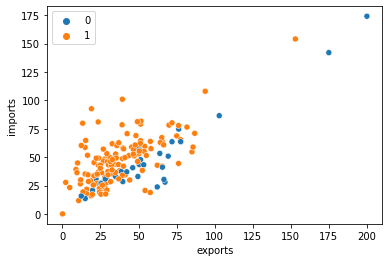

In [29]:
sns.scatterplot(x =df1['exports'] , y = df1['imports'], hue=y)

<AxesSubplot:xlabel='life_expec', ylabel='health'>

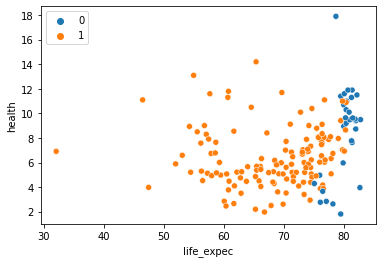

In [30]:
sns.scatterplot(x =df1['life_expec'] , y = df1['health'], hue=y)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

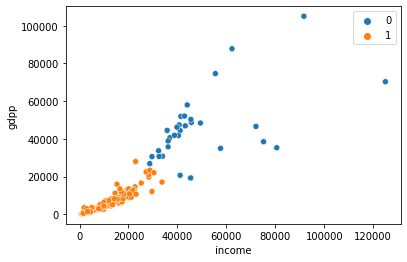

In [31]:
sns.scatterplot(x =df1['income'] , y = df1['gdpp'], hue=y)

In [33]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df1, y_df], axis=1)
new_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  index  Cluster  
0         9.44        56.2       5.82    553      1        1  
1         4.49        76.3       1.65   4090      2        1  
2        16.10        76.5       2.89   4460      3        1  
3        22.40        60.1       6.16   3530      4        1  
4         1.44        76.8       2.13  12200      5        1  
..         ...         ...        ...    ...    ...      ...  
162       2.62        63.0       3.50   2970    163        1  
163      45.90        75.4       2.47  13500    164        1  
164      12.10        73.1       1.95   1310    165        1  
165      23.60        67.5       4.67   1310    166        1  
166      14.00        52.0       5.40   1460    167        1  

[167 rows x 12 columns]

In [34]:
new_df.loc[new_df['country'] == 'United States']

country  child_mort  exports  health  imports  income  inflation  \
159  United States         7.3     12.4    17.9     15.8   49400       1.22   

     life_expec  total_fer   gdpp  index  Cluster  
159        78.7       1.93  48400    160        0

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

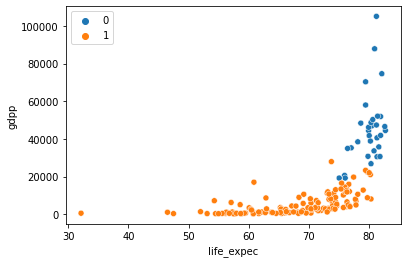

In [35]:
sns.scatterplot(x =df1['life_expec'] , y = df1['gdpp'], hue=y)

<AxesSubplot:xlabel='imports', ylabel='exports'>

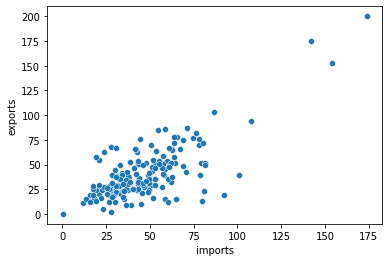

In [36]:
sns.scatterplot(x='imports', y='exports', data=df1)

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

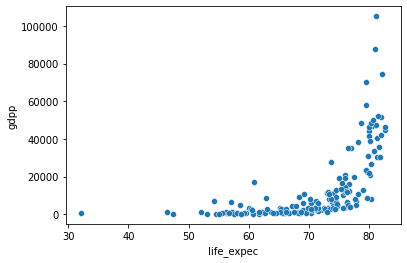

In [37]:
sns.scatterplot(x='life_expec', y='gdpp', data=df1)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

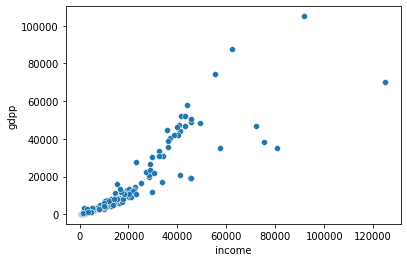

In [38]:
sns.scatterplot(x='income', y='gdpp', data=df1)